In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/bigmart_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
#Handling Outliers
## Percentile method
### IQR Method
####Standard Deviation Method

In [ ]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Item_Weight.min()
p100=df.Item_Weight.max()
q1=df.Item_Weight.quantile(0.25)    #25th Quantile value
q2=df.Item_Weight.quantile(0.5)     #50th Quantile value
q3=df.Item_Weight.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [ ]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

-3.340625000000003 28.964375000000004


In [ ]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 4.555 
p100 = 21.35 
lc = -3.340625000000003 
uc = 28.964375000000004


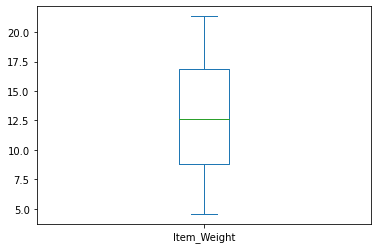

In [ ]:
df.Item_Weight.plot(kind='box')  #using pandas

In [ ]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Item_Visibility.min()
p100=df.Item_Visibility.max()
q1=df.Item_Visibility.quantile(0.25)    #25th Quantile value
q2=df.Item_Visibility.quantile(0.5)     #50th Quantile value
q3=df.Item_Visibility.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [ ]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

-0.07440424500000001 0.195979015


In [ ]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 0.0 
p100 = 0.328390948 
lc = -0.07440424500000001 
uc = 0.195979015


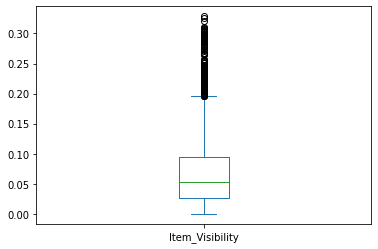

In [ ]:
df.Item_Visibility.plot(kind='box')  #using pandas

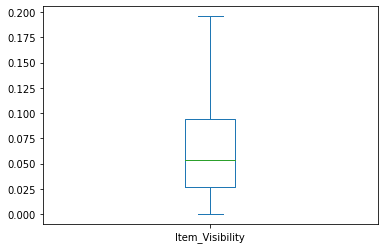

In [ ]:
#Outlier Treatment
## Clipping all values greater than the upper cutoff to the upper cutoff

df.Item_Visibility.clip(upper=upper_cutoff)
df.Item_Visibility.clip(upper=upper_cutoff,inplace=True)
df.Item_Visibility.plot(kind='box')

In [ ]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Item_MRP.min()
p100=df.Item_MRP.max()
q1=df.Item_MRP.quantile(0.25)    #25th Quantile value
q2=df.Item_MRP.quantile(0.5)     #50th Quantile value
q3=df.Item_MRP.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [ ]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

-43.8993 323.3695


In [ ]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 31.29 
p100 = 266.8884 
lc = -43.8993 
uc = 323.3695


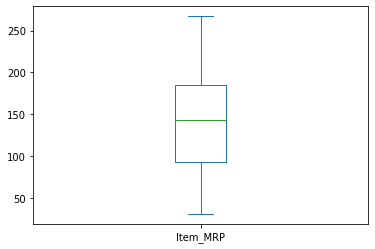

In [ ]:
df.Item_MRP.plot(kind='box')  #using pandas

In [ ]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Outlet_Establishment_Year.min()
p100=df.Outlet_Establishment_Year.max()
q1=df.Outlet_Establishment_Year.quantile(0.25)    #25th Quantile value
q2=df.Outlet_Establishment_Year.quantile(0.5)     #50th Quantile value
q3=df.Outlet_Establishment_Year.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [ ]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

1961.5 2029.5


In [ ]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 1985 
p100 = 2009 
lc = 1961.5 
uc = 2029.5


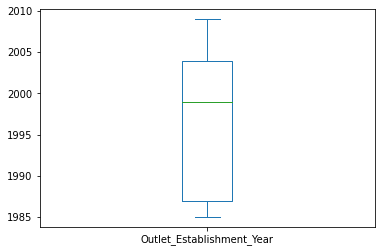

In [ ]:
df.Outlet_Establishment_Year.plot(kind='box')  #using pandas

In [ ]:
#continous data --> variable possesses range
#categorical data --> variable doesn't possesses range
p0=df.Item_Outlet_Sales.min()
p100=df.Item_Outlet_Sales.max()
q1=df.Item_Outlet_Sales.quantile(0.25)    #25th Quantile value
q2=df.Item_Outlet_Sales.quantile(0.5)     #50th Quantile value
q3=df.Item_Outlet_Sales.quantile(0.75)    #75th Quantile value

iqr=q3 - q1  #Inter quantile  range

In [ ]:
lower_cutoff= q1 - 1.5*iqr            #if lower_cutoff<p0 --> There are NO outliers on the lower side
upper_cutoff= q3 + 1.5*iqr            # if upper_cutoff>p100 --> There are NO ouliers in the Upper side
print(lower_cutoff,upper_cutoff)

-2566.3261 6501.8699


In [ ]:
print("p0 =",p0,
      "\np100 =",p100,
      "\nlc =",lower_cutoff,
      "\nuc =",upper_cutoff)

p0 = 33.29 
p100 = 13086.9648 
lc = -2566.3261 
uc = 6501.8699


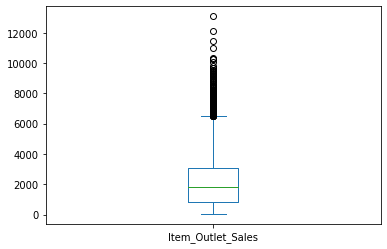

In [ ]:
df.Item_Outlet_Sales.plot(kind='box')  #using pandas

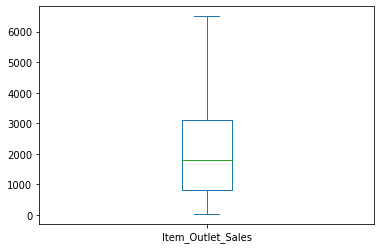

In [ ]:
#Outlier Treatment
## Clipping all values greater than the upper cutoff to the upper cutoff

df.Item_Outlet_Sales.clip(upper=upper_cutoff)
df.Item_Outlet_Sales.clip(upper=upper_cutoff,inplace=True)
df.Item_Outlet_Sales.plot(kind='box')